In [1]:
from settings import *

In [2]:
tickers = ['kodex200', 'kbond3y']
read_df = get_data()
read_df = read_df[tickers]
read_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5433 entries, 2000-01-04 to 2021-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kodex200  5433 non-null   float64
 1   kbond3y   5433 non-null   float64
dtypes: float64(2)
memory usage: 127.3 KB


In [3]:
data = read_df['2001':].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5192 entries, 2001-01-02 to 2021-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kodex200  5192 non-null   float64
 1   kbond3y   5192 non-null   float64
dtypes: float64(2)
memory usage: 121.7 KB


In [4]:
주식현금혼합전략 = bt.Strategy('1:1분산리밸런싱',
    [
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ]
)

In [5]:
bt_kodex200 = long_only_ew(data, ['kodex200'], 'kodex200', initial_capital=100000000)
bt_kbond3y = long_only_ew(data, ['kbond3y'], 'kbond3y', initial_capital=100000000)
bt_ew = long_only_ew(data, ['kodex200', 'kbond3y'], '동일비중', initial_capital=100000000)
bt_test = bt.Backtest(주식현금혼합전략, data, initial_capital=100000000)

In [6]:
r = bt.run(bt_kodex200, bt_kbond3y, bt_test)

2001-01-02 00:00:00
2001-01-02 00:00:00
2001-01-02 00:00:00
2001-01-31 00:00:00
2001-02-28 00:00:00
2001-03-30 00:00:00
2001-04-30 00:00:00
2001-05-31 00:00:00
2001-06-29 00:00:00
2001-07-31 00:00:00
2001-08-31 00:00:00
2001-09-28 00:00:00
2001-10-31 00:00:00
2001-11-30 00:00:00
2001-12-28 00:00:00
2002-01-31 00:00:00
2002-02-28 00:00:00
2002-03-29 00:00:00
2002-04-30 00:00:00
2002-05-31 00:00:00
2002-06-28 00:00:00
2002-07-31 00:00:00
2002-08-30 00:00:00
2002-09-30 00:00:00
2002-10-31 00:00:00
2002-11-29 00:00:00
2002-12-30 00:00:00
2003-01-30 00:00:00
2003-02-28 00:00:00
2003-03-31 00:00:00
2003-04-30 00:00:00
2003-05-30 00:00:00
2003-06-30 00:00:00
2003-07-31 00:00:00
2003-08-29 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-28 00:00:00
2003-12-30 00:00:00
2004-01-30 00:00:00
2004-02-27 00:00:00
2004-03-31 00:00:00
2004-04-30 00:00:00
2004-05-31 00:00:00
2004-06-30 00:00:00
2004-07-30 00:00:00
2004-08-31 00:00:00
2004-09-30 00:00:00
2004-10-29 00:00:00
2004-11-30 00:00:00


In [7]:
r.backtests['1:1분산리밸런싱'].stats.display()

Stats for price from 2001-01-01 00:00:00 - 2021-12-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
379.73%             0.74  7.76%   -27.48%

Annualized Returns:
mtd    3m      6m      ytd    1y     3y     5y     10y    incep.
-----  ------  ------  -----  -----  -----  -----  -----  --------
3.23%  -0.45%  -4.67%  1.19%  1.19%  9.56%  6.50%  4.90%  7.76%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.74     0.76       0.68
mean    8.24%    7.53%      7.69%
vol     11.17%   9.91%      11.36%
skew    -0.15    0.03       -0.12
kurt    6.09     0.50       0.11
best    6.09%    10.16%     27.70%
worst   -5.89%   -8.82%     -17.81%

Drawdowns:
max      avg       # days
-------  ------  --------
-27.48%  -1.81%     35.99

Misc:
---------------  ------
avg. up month    2.36%
avg. down month  -2.12%
up year %        80.00%
12m up %         7

In [8]:
r.display()

Stat                 kodex200    kbond3y     1:1분산리밸런싱
-------------------  ----------  ----------  -----------------
Start                2001-01-01  2001-01-01  2001-01-01
End                  2021-12-30  2021-12-30  2021-12-30
Risk-free rate       0.00%       0.00%       0.00%

Total Return         781.49%     108.87%     379.73%
Daily Sharpe         0.58        2.53        0.74
Daily Sortino        0.93        4.17        1.19
CAGR                 10.92%      3.57%       7.76%
Max Drawdown         -52.67%     -1.91%      -27.48%
Calmar Ratio         0.21        1.87        0.28

MTD                  6.52%       -0.07%      3.23%
3m                   -0.81%      -0.26%      -0.45%
6m                   -9.05%      -0.32%      -4.67%
YTD                  2.77%       -0.68%      1.19%
1Y                   2.77%       -0.68%      1.19%
3Y (ann.)            17.32%      1.34%       9.56%
5Y (ann.)            10.82%      1.55%       6.50%
10Y (ann.)           6.81%       2.47%       4.90%


In [9]:
r.prices.resample('M').last().to_drawdown_series().describe()

,kodex200,kbond3y,1:1분산리밸런싱
count,252.000,252.000,252.000
mean,-0.099,-0.001,-0.032
std,0.092,0.003,0.043
min,-0.455,-0.019,-0.224
25%,-0.145,-0.001,-0.044
50%,-0.084,0.000,-0.017
75%,-0.023,0.000,0.000
max,0.000,0.000,0.000


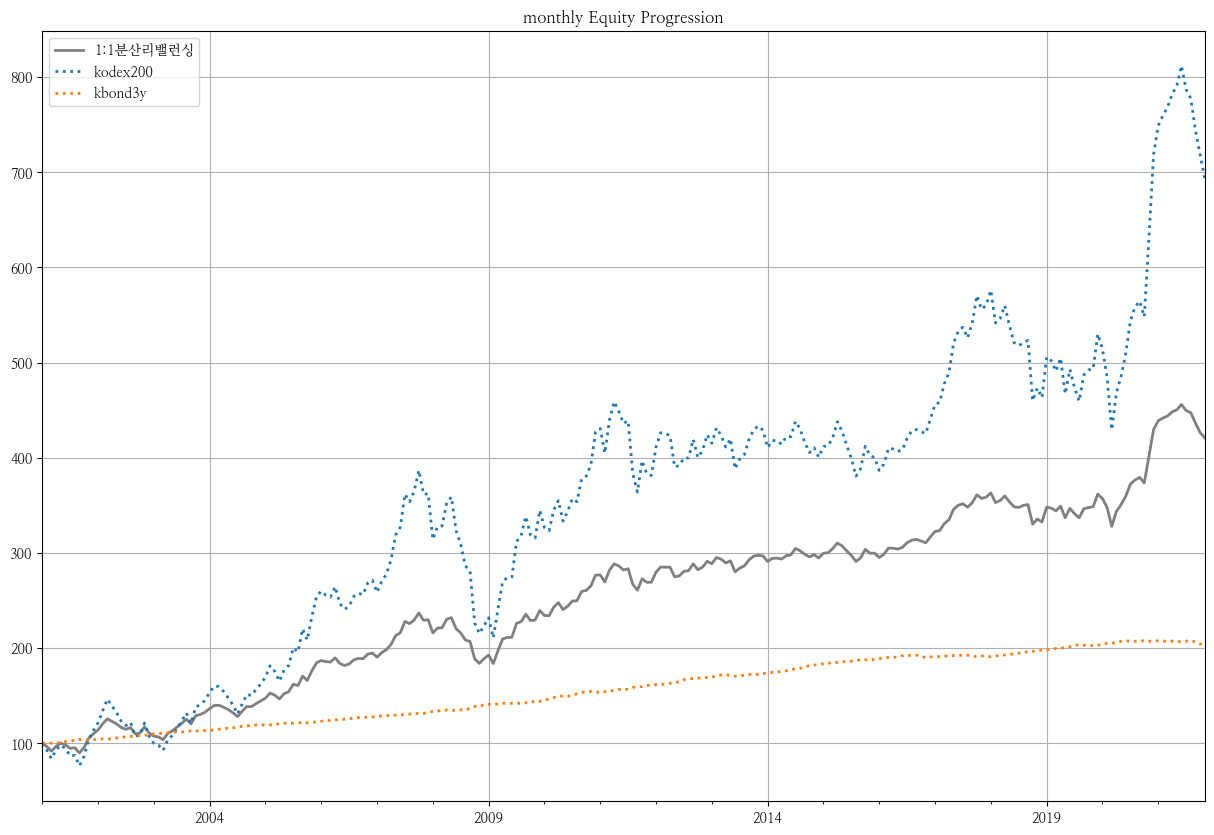

In [10]:
r0 = bt.run(bt_test)
r_assets = bt.run(bt_kodex200, bt_kbond3y)

ax1 = r0.plot(freq='M', lw=2, color='grey', figsize=(15, 10));
r_assets.plot(ax=ax1, freq='M', ls=':', lw=2, figsize=(15,10));

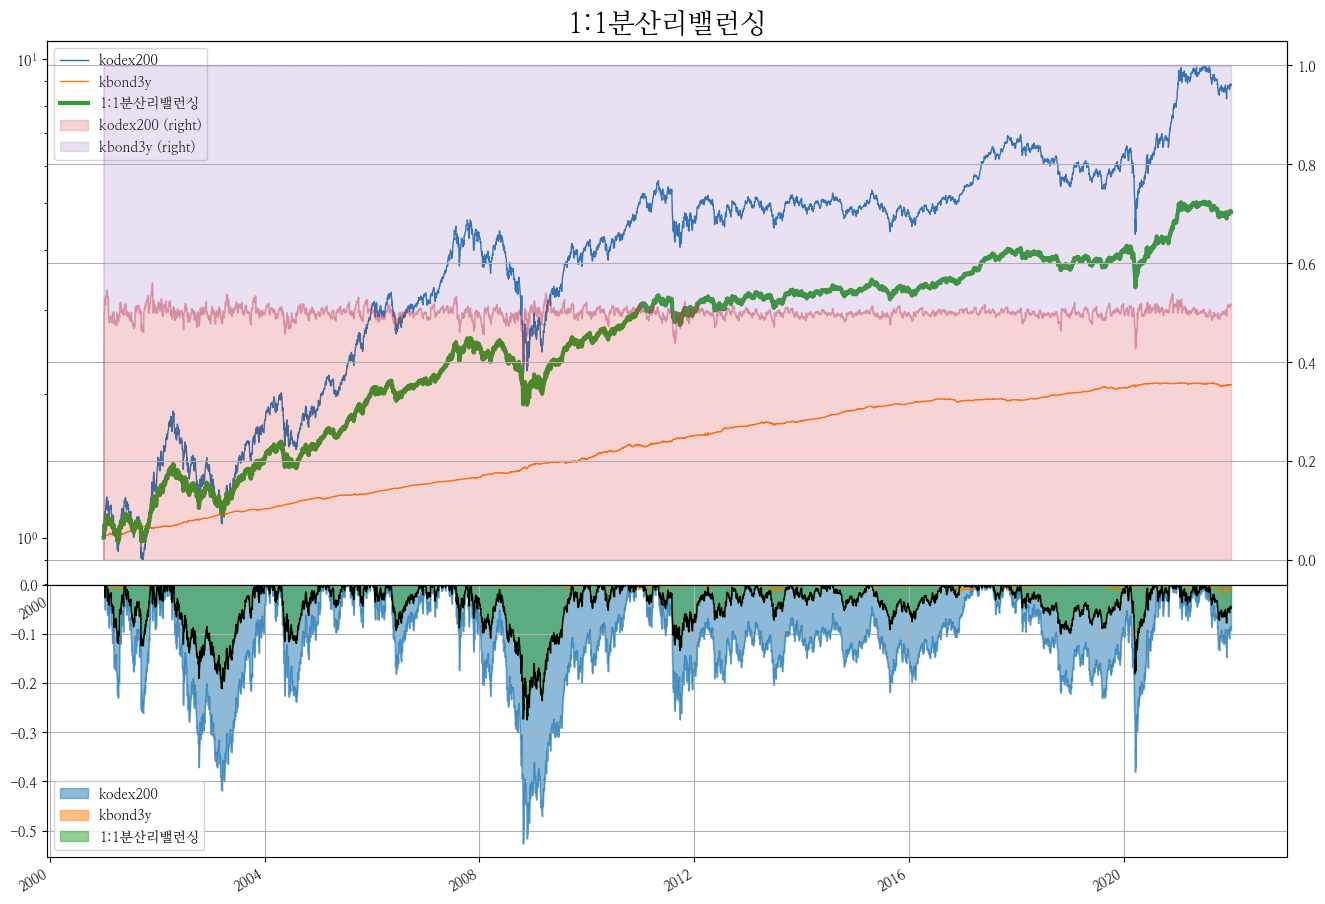

In [11]:
plot_assets(r, '2001', '2021', '1:1분산리밸런싱')

In [12]:
r_ew = bt.run(bt_test, bt_ew)

2001-01-02 00:00:00


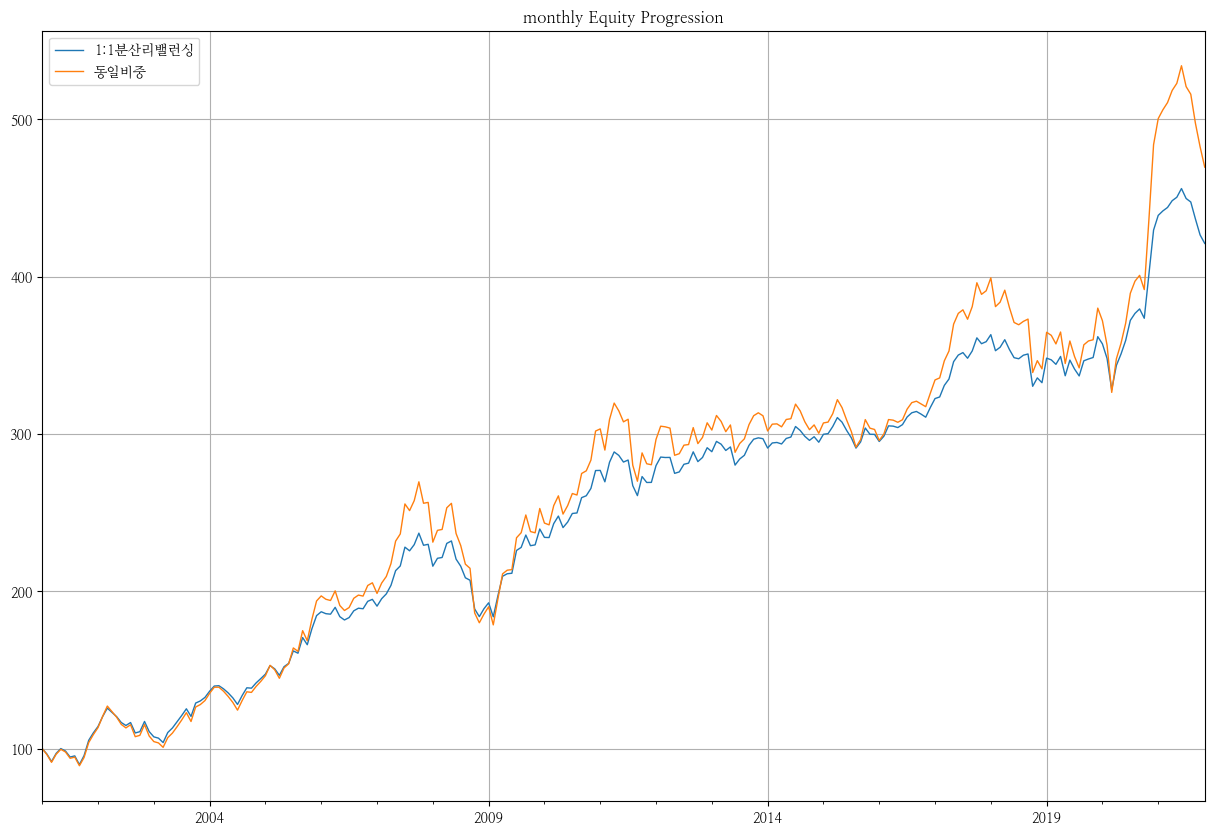

In [13]:
r_ew.plot(freq='M', figsize=(15,10));

In [14]:
r_ew.display()

Stat                 1:1분산리밸런싱    동일비중
-------------------  -----------------  ----------
Start                2001-01-01         2001-01-01
End                  2021-12-30         2021-12-30
Risk-free rate       0.00%              0.00%

Total Return         379.73%            445.16%
Daily Sharpe         0.74               0.62
Daily Sortino        1.19               1.00
CAGR                 7.76%              8.41%
Max Drawdown         -27.48%            -39.76%
Calmar Ratio         0.28               0.21

MTD                  3.23%              5.19%
3m                   -0.45%             -0.70%
6m                   -4.67%             -7.50%
YTD                  1.19%              2.09%
1Y                   1.19%              2.09%
3Y (ann.)            9.56%              13.46%
5Y (ann.)            6.50%              8.63%
10Y (ann.)           4.90%              5.81%
Since Incep. (ann.)  7.76%              8.41%

Daily Sharpe         0.74               0.62
Daily Sortino       

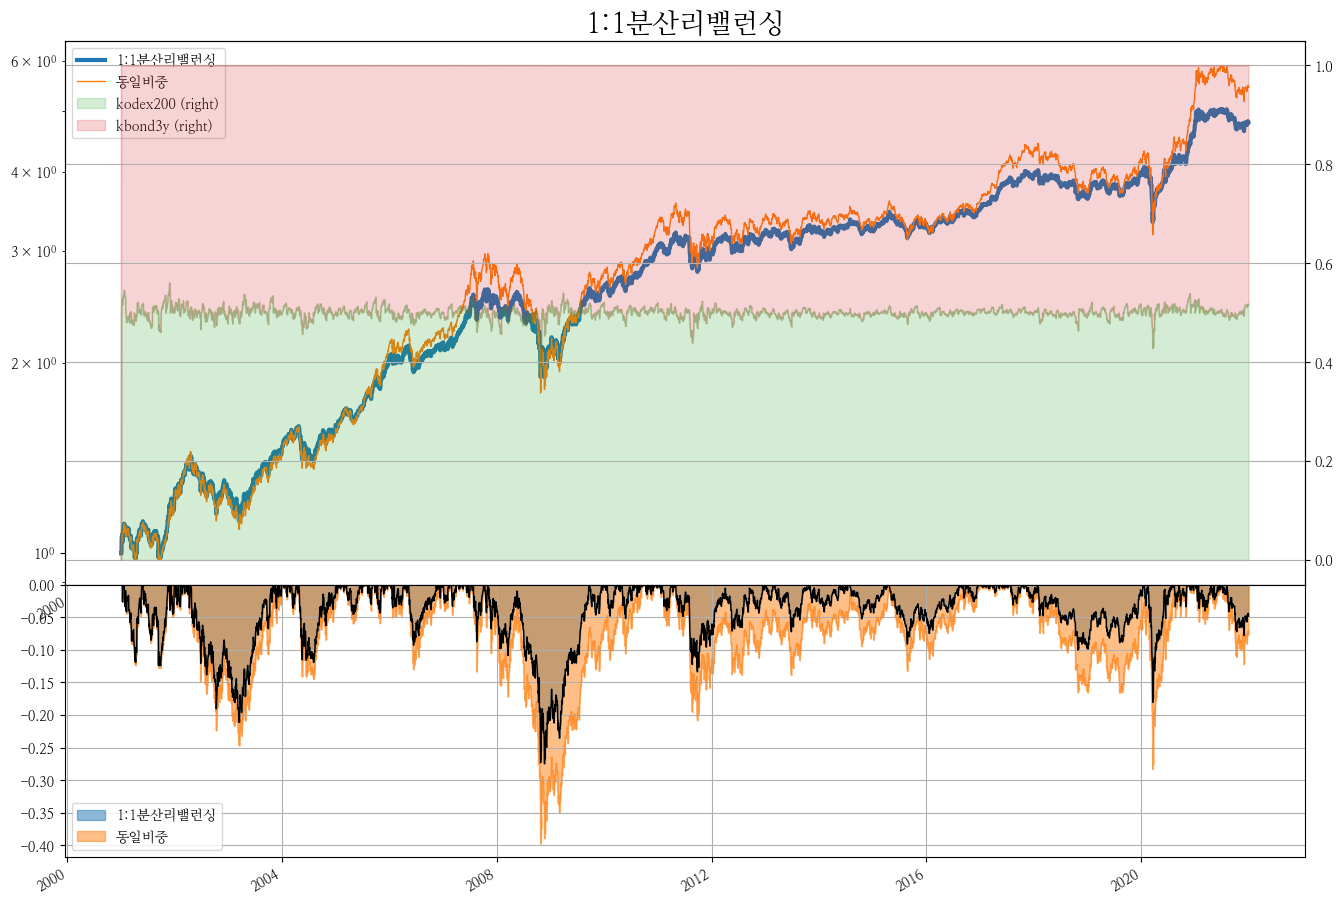

In [15]:
plot_assets(r_ew, '2001', '2021', '1:1분산리밸런싱')